<a href="https://colab.research.google.com/github/lucas-pinto/NUIN443/blob/main/problemSets/NUIN443_ps6_HMM%2BLDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Packages**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Some helper functions for Gaussians
from numpy.random import normal, multivariate_normal
from scipy.stats import norm

#Some scikit learn models we'll be using
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA,FactorAnalysis

#To load the data file
import pickle



## 1) Hidden Markov Models


A) Write code to simulate data from the an HMM with 2 discrete states (indexed by 0 and 1), with 1-dimensional Gaussian observations.
<br><br>
The initial state probabilities are:<br>
$P(z_0=0)=0.5$,
$P(z_0=1)=0.5$
<br><br>
The transitions matrix is:<br>
$A = \begin{bmatrix} 0.9 & 0.1 \\ 0.05 & 0.95 \end{bmatrix}$
<br><br>
The emissions probabilities are:<br>
$P(y|z=0)=\mathcal{N}(0,1)$
<br>
$P(y|z=1)=\mathcal{N}(2,1)$

<br><br>
We've provided code below that you can fill in (which should hopefully make this faster for you)

*Credit: Note that the below code has been adapted from Neuromatch's HMM exercise.*

In [3]:
## Fill in parameters below##

#Initial probabilities
initial_probs=[0.5, 0.5]

#Transition matrix
transition_matrix=np.array([[0.9, 0.1],[0.05, 0.95]])

#Means for the 2 states
means= [0,2]

#Variances for the 2 states
varz= [1,1]



#Number of time points to run the simulation for
T=500


#We'll set the random seed so results are reproducible
np.random.seed(0)

# Initialize the latent (Z) and observation (X)
Z = np.zeros((T,),dtype=int)
X = np.zeros((T,))



# Sample initial (time 0) latent state
## Fill in the line below##
Z[0] = np.random.choice([0,1],p= initial_probs)

# Given the latent that was just sampled, determine the observation at time 0
## Fill in the line below##
X[0] = normal(means[Z[0]], varz[Z[0]] )

# Loop over time points
# At each time point, sample the next latent state (based on the transition matrix and the previous state),
# and then determine the observation at that time point
for t in range(1,T):

  # Determine latent state at time `t`
  ## Fill in the line below##
  transition_vector = transition_matrix[Z[t-1],:]
  Z[t] = np.random.choice([0,1],p=transition_vector)

  #Given the latent that was just sampled, determine the observation at time t
  ## Fill in the line below##
  X[t] = normal(means[Z[t]], varz[Z[t]])

Run the code below to plot the latent (Z) and the observations (X)

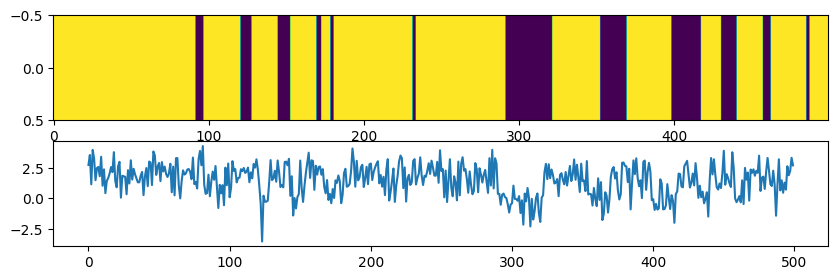

In [4]:
plt.figure(figsize=(10,3))

plt.subplot(2,1,1)
plt.imshow(Z[None,:],aspect='auto')

plt.subplot(2,1,2)
plt.plot(X)

B) Fit K-means to the observations. You can use sci-kit learn (imported above)

In [12]:
km = KMeans(n_clusters=2)
Z_kmeans = km.fit_predict(X.reshape(-1,1))

/home/diya/anaconda3/envs/mp_opto/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Run the below code to see how the states learned compare to the ground truth HMM states. Change "Z_kmeans" to the variable name of the kmeans states you used above.

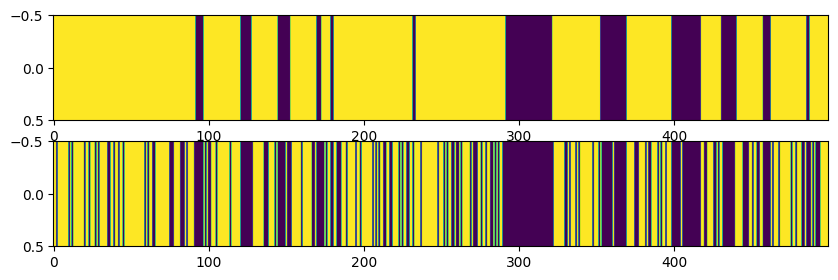

In [13]:
plt.figure(figsize=(10,3))

plt.subplot(2,1,1)
plt.imshow(Z[None,:],aspect='auto')

plt.subplot(2,1,2)
plt.imshow(Z_kmeans[None,:],aspect='auto')


C)Calculate the accuracy of K-means at finding the ground truth HMM states

In [15]:
corrects = np.count_nonzero(Z_kmeans == Z)
print(corrects / len(Z))

0.748


D) We are not going to have you code up the full EM algorithm, but will have you do most of the E step. This will involve the forward/backward algorithm. Assume that you know the HMM parameters (use the ground truth ones).<br>
Code up the forward algorithm for HMMs, and use it to calculate "alphas" for all time points.

Run the below code to see how the alphas compare to the ground truth HMM states. Change "alphas" to the variable name you used above. This is a good sanity check that the above code is correct, since the alphas for one of the states will look somewhat similar to the ground truth (although the values won't always be exactly 0 and 1).

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(2,1,1)
plt.plot(alphas)

plt.subplot(2,1,2)
plt.plot(Z)

E) Code up the backward algorithm for HMMs, and use it to calculate "betas" for all time points.

Run the below code to see how the betas compare to the ground truth HMM states. Change "betas" to the variable name you used above. This is a good sanity check that the above code is correct, since the betas for one of the states will look somewhat similar to the ground truth (although the values won't always be exactly 0 and 1 - in fact, for the betas, the values here will be between ~0.1 and 0.9).

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(2,1,1)
plt.plot(betas)

plt.subplot(2,1,2)
plt.plot(Z)

F) Run the forward/backward algorithm (combining the steps above) to get the posterior, p(z|x).

Run the below code to see how the posterior compares to the ground truth HMM states. Change "posterior" to the variable name you used above.

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(2,1,1)
plt.plot(posterior)

plt.subplot(2,1,2)
plt.plot(Z)

G) Calculate the accuracy of the posterior at estimating the ground truth latent states. Set a probability threshold of 0.5 to determine which of the two states is more likely.

H) In words, in the text box below, describe why the HMM led to more accurate results than fitting with K-means.

As a side note, this increase in accuracy is not just because we were cheating above and using the ground truth parameters. Fitting an HMM with EM gives similar results.

## 2) Linear dynamical systems

We'll be using the ssm package for fitting linear dynamical systems. Run the code below to install that package.

In [ ]:
!pip install git+https://github.com/lindermanlab/ssm.git@master#egg=ssm

import ssm

A) Fill in the code below to simulate data from a linear dynamical system model with 2-dimensional latents, with 5-dimensional observations.

<br>
The dynamics matrix is the scaled rotation matrix (which will cause the latents to spiral) :<br>
$A = \begin{bmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{bmatrix} \text{for  } \theta=\pi/20$

<br><br>
In the code below, the emissions (observations) matrix is random, and there is more noise in the observations than the dynamics (see code below).


In [ ]:
#Dimensionality of latents
K=2
#Dimensionality of observations
N=5

#Initial latent state
Z0=np.array([.5,.5])

#Dynamics matrix
th=np.pi/20
A = .995 * np.array([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]])

#Noise of dynamics
Sig_dynamics=.0001*np.identity(K)

#Emissions (observations) matrix
C=np.random.randn(K,N)

#Noise of observations
Sig_observations=.01*np.identity(N)

#Number of time points to simulate for
T=500

#Initialize latents and observations
Z = np.zeros((T,K))
Y = np.zeros((T,N))

#Set initial state (at time 0) of the latents
Z[0]=Z0

#Update observations at time t according to the latent state
## FILL IN LINE BELOW ##
Y[0]=

# Loop over time points
# At each time point, sample the next latent state (based on the dynamics matrix and the previous state),
# and then determine the observation at that time point
for t in range(1,T):
  #Update latent state at time t according to dynamics
  ## FILL IN LINE BELOW ##
  Z[t]=

  #Update observations at time t according to the latent state
  ## FILL IN LINE BELOW ##
  Y[t]=

Run the code below to plot the two dimensions of the latent against each other (to see the spiral if the above simulation is correct)

In [ ]:
plt.plot(Z[:,0],Z[:,1])

Run the code below to plot the two dimensions of the latent as a function of time

In [ ]:
plt.plot(Z[:,0])
plt.plot(Z[:,1])
plt.legend(['Latent Dim 1','Latent Dim 2'])

Run the code below to plot the first two dimensions of the observations as a function of time

In [ ]:
plt.plot(Y[:,0])
plt.plot(Y[:,1])
plt.legend(['Obs Dim 1','Obs Dim 2'])

B) Fit a factor analysis model (using sci-kit learn) with 2 latents to the above observations

In [ ]:
fa=FactorAnalysis(2)
z_fa=fa.fit_transform(Y)

C) Plot the 2 factor analysis latents as a function of time

In [ ]:
plt.plot(z_fa)

D) Fit an LDS model to the data

You can run the ssm code below (no need to make any changes). Still, read through the code/comments to try to generally understand the below code.

In [ ]:
obs_dim=N
latent_dim=K

#Define an LDS model that has a Gaussian emissions model, with the correct latent and observation dimensions
lds = ssm.LDS(obs_dim, latent_dim, emissions="gaussian")

#Fit the LDS model using EM
#Note the method says 'laplace_em', which becomes standard EM with Gaussian emissions
elbos, q = lds.fit(Y, method="laplace_em", num_iters=10)

#The output q contains the posterior distribution (the latent's mean and variance)
#Below, we'll just extract the mean of the posterior at each time point (the value we usually think of as the latent):
z_lds = q.mean_continuous_states[0]

E) Plot the latents learned by LDS

F) How do the learned latents differ between the factor analysis and LDS models? Why?  (Enter your answer in the text box below)

G) Run the below code to check that the eigenvalues of the system's dynamics (the A matrix) were recovered correctly. Note that the eigenvectors, and the A matrices themselves won't be identical, because the emissions matrix can be recovered differently from the ground truth (e.g. some linear combination of the ground truth).

In [ ]:
#Eigendecomposition of true dynamics
np.linalg.eig(A)

In [ ]:
#Eigendecomposition of learned dynamics
np.linalg.eig(lds.dynamics.As)

### 2) LDS on Real Neural Data

Now we're going to fit an LDS to some real neural data. This is data collected in Lee Miller's lab from motor cortex while a monkey continues to reach to targets across a workspace. All trials are concatenated together in time. <br>

"Neural data" is a variable of size Timepoints x Neurons, where each entry is the firing rate of a given neuron in that time bin. <br>
"Velocity" is a variable of size Timepoints x 2, where each timepoint has the x and y velocities of the hand.

Each time bin, of both neural activity and velocity, is duration 50ms.

In [ ]:
#Download and load the data

!wget -nc https://www.dropbox.com/s/jcief15oql3tkll/example_data_m1.pickle?dl=0

filename    = 'example_data_m1.pickle?dl=0'
with open(filename, 'rb') as handle:
    [Neural_data,Velocity] = pickle.load(handle)

File ‘example_data_m1.pickle?dl=0’ already there; not retrieving.



A) Fit a Factor Analysis model to the Neural data with 10 latents

B) Fit a linear dynamical systems model to the neural data with 10 latents. Note that this will take a couple minutes to fit. You can just run the code below.

In [ ]:
obs_dim=Neural_data.shape[1]
latent_dim=10

#Declare the LDS model
lds = ssm.LDS(obs_dim, latent_dim, emissions="gaussian")

#Fit the LDS model
elbos, q = lds.fit(Neural_data, method="laplace_em", num_iters=10)

#Get the latents:
z_lds = q.mean_continuous_states[0]

C) Plot the FA and LDS latents. You can just run the code below, but change the variable names as needed.

In [ ]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(z_fa[:200,:2])
plt.title('FA latents')
plt.xticks([])

plt.subplot(2,1,2)
plt.plot(z_lds[:200,:2])
plt.title('LDS latents')


D) At least to me, unlike the simulation example above, it's not obvious in the above plots that the LDS model has smoother latents. In the text box below, why do you think LDS doesn't lead to such smooth responses here. (Hint: There are realistically multiple reasons, but I'm mainly looking for whether LDS is a good model for this data, which contains an entire experiment concatenated together).

E) Still, let's quantitatively see how 'relatively smooth' the latents are. For each latent, we'll calculate the squared change in the latent at each time point, relative to the average squared magnitude of the latent. A smaller value will mean it's smoother (changing less from one time point to the next). We will then plot a histogram of this relative change. Run the below code cells

In [ ]:
z=np.copy(z_fa)
relative_change_fa=[np.mean((z[1:,l]-z[:-1,l])**2)/np.mean(z[:,l]**2) for l in range(10)]
print(relative_change_fa)

In [ ]:
z=np.copy(z_lds)
relative_change_lds=[np.mean((z[1:,l]-z[:-1,l])**2)/np.mean(z[:,l]**2) for l in range(10)]
print(relative_change_lds)

In [ ]:
plt.hist(relative_change_fa,alpha=0.5)
plt.hist(relative_change_lds,alpha=0.5)
plt.xlabel('Relative change (lower is smoother)')
plt.ylabel('Number of latents')

plt.legend(['FA','LDS'])

F) Does LDS lead to smoother latents (Yes or No)? Answer in the text box below.

G) One way to validate that we are getting a better estimate of the underlying latents is to try to see which set of latents best relates to a separate, external variable (here, velocity).

Fit decoding models from 1) the Factor analysis latents to velocity, and 2) the LDS latents to velocity, and see which leads to better performance.

For the sake of time, you can do this is a non-rigorous (non-cross-validated way). Just report the "score" from two sci-kit learn linear regression models, where you train on all of the data.

In [ ]:
#Fit linear regression model based on factor analysis latents



In [ ]:
#Fit linear regression model based on LDS latents

